## 1 - XOR in Keras

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, optimizers, callbacks
from keras.backend import clear_session
from tensorflow import random, math
import seaborn as sns


random.set_seed(48)

In [98]:
x = np.array([[0,0],[1,1],[1,0],[0,1]])
y = np.array([[0], [0], [1], [1]])


In [99]:
model = models.Sequential([
    layers.Input(shape=(2,)),
    # Hidden layer with ReLU
    layers.Dense(2, activation='relu'),
    # Output layer with Sigmoid (common for binary classification)
    layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [102]:
adam = optimizers.Adam(learning_rate=.01)
sgd = optimizers.SGD(learning_rate=0.6, momentum=0.9)

model.compile(optimizer = sgd, loss='binary_crossentropy', metrics=['accuracy'], )

In [103]:
early_stopping = callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(x=x, y=y, epochs=50, callbacks=[early_stopping])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7500 - loss: 0.6371
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.6305
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 0.6158
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 0.5926
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5613
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5367
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5403
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5108
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.4901
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.4743
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.4525
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.4227


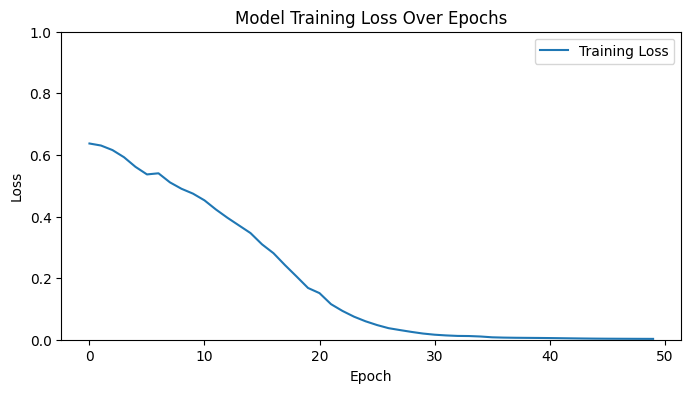

In [104]:

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.ylim(top=1, bottom=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Loss Over Epochs')
plt.legend()
plt.show()


In [105]:
print(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[4.9930532e-04]
 [9.3751645e-04]
 [9.9196595e-01]
 [9.9894893e-01]]


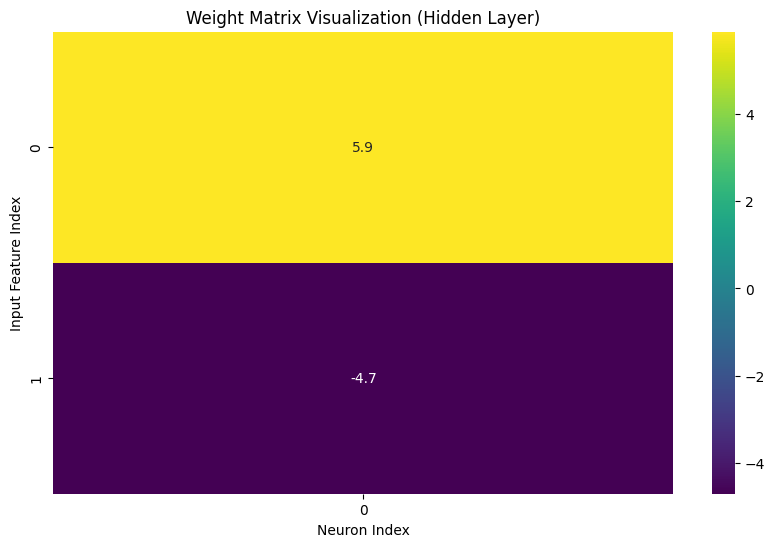

In [106]:
# Get weights from the first dense layer
W, b = model.layers[1].get_weights()

plt.figure(figsize=(10, 6))
sns.heatmap(W, annot=True, cmap="viridis")
plt.title("Weight Matrix Visualization (Hidden Layer)")
plt.xlabel("Neuron Index")
plt.ylabel("Input Feature Index")
plt.show()

## 2 - NN for regression

In [264]:
def f(x,y):
    part_1 = -(x * (x - 1) + y * (1 - y))
    part_2 = .5 * np.cos(x * y) * np.sin(2 * x + y)
    return part_1 + part_2

(100, 100)
(100, 100)
(100, 100)


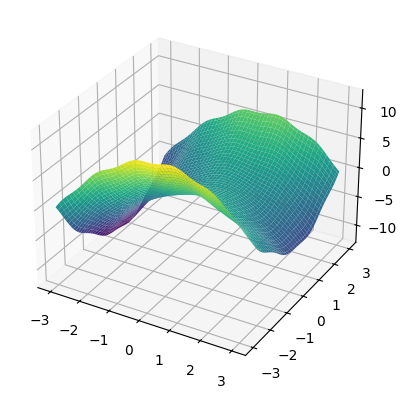

In [265]:

# time the function
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
X2 = X * X
Y2 = Y * Y
XY = X * Y
Z = f(X, Y)
print(X.shape)
print(Y.shape)
print(Z.shape)

# plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


In [266]:

# create a neural network
m2 = models.Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(8),
    layers.Lambda(lambda x: math.tanh(x)),
    layers.Dense(4),
    layers.Lambda(lambda x: math.tanh(x)),
    layers.Dense(1, activation='linear')
])

m2.summary()


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_152 (Dense)               │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_10 (Lambda)              │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_11 (Lambda)              │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

In [267]:
adam2 = optimizers.Adam(learning_rate=1e-2)

m2.compile(optimizer = adam2, loss='mean_squared_error')

In [268]:
X = X.ravel()
Y = Y.ravel()
Z = Z.ravel()
X2 = X2.ravel()
Y2 = Y2.ravel()
XY = XY.ravel()
print(XY)
# join X and Y into a 2D array
input_data = np.column_stack((X, Y, X2, Y2, XY))
print(input_data.shape)
print(input_data)


[9.         8.81818182 8.63636364 ... 8.63636364 8.81818182 9.        ]
(10000, 5)
[[-3.         -3.          9.          9.          9.        ]
 [-2.93939394 -3.          8.64003673  9.          8.81818182]
 [-2.87878788 -3.          8.28741965  9.          8.63636364]
 ...
 [ 2.87878788  3.          8.28741965  9.          8.63636364]
 [ 2.93939394  3.          8.64003673  9.          8.81818182]
 [ 3.          3.          9.          9.          9.        ]]


In [269]:
# early stopping

history2 = m2.fit(x=input_data, y=Z, epochs=100, validation_split=0.2)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 6.5960 - val_loss: 0.7579
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.5522 - val_loss: 0.4514
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.1852 - val_loss: 0.5512
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 0.1034 - val_loss: 0.4977
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.0737 - val_loss: 0.4853
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.0594 - val_loss: 0.5929
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.0515 - val_loss: 0.8064
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.0483 - val_loss: 1.0090
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 0.0450 - val_loss: 1.1324
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.0428 - val_loss: 1.2457
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.0412 - val_loss: 1.3916
Epoch 12/100
250/25

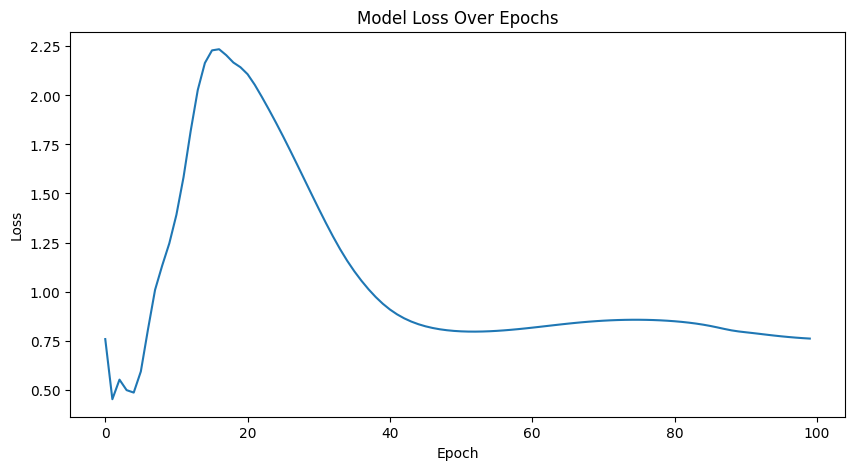

In [270]:
# plot the history
plt.figure(figsize=(10, 5))
plt.plot(history2.history['val_loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [285]:
clear_session()

input_layer = layers.Input(shape=(5,))

# Function model
branch_1 = layers.Dense(2, activation='relu')(input_layer)
branch_2 = layers.Dense(2)(input_layer)
branch_2 = layers.Lambda(lambda x: math.cos(x))(branch_2)
branch_3 = layers.Dense(2)(input_layer)
branch_3 = layers.Lambda(lambda x: math.sin(x))(branch_3)

concat = layers.Concatenate()([branch_1, branch_2, branch_3])
final_processing = layers.Dense(6, activation='relu')(concat)
output = layers.Dense(1, activation='linear')(final_processing)

model = models.Model(inputs=input_layer, outputs=output)
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 2)         │         12 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2)         │         12 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2)         │         12 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 2)         │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 2)         │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 6)         │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ lambda[0][0],     │
│                     │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 6)         │         42 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │          7 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 85 (340.00 B)

 Trainable params: 85 (340.00 B)

 Non-trainable params: 0 (0.00 B)

In [286]:
# compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

# fit the model
history = model.fit(x=input_data, y=Z, epochs=100, validation_split=0.2)



Epoch 1/100


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - loss: 17.6679 - val_loss: 16.2016
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 5.9141 - val_loss: 11.7536
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 1.4145 - val_loss: 6.1296
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.4951 - val_loss: 3.5450
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.2266 - val_loss: 2.5417
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.1495 - val_loss: 1.7825
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.1087 - val_loss: 1.0268
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 0.0776 - val_loss: 0.4589
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.0560 - val_loss: 0.3200
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.0470 - val_loss: 0.2887
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.0419 - val_loss: 0.2835
Epoch 12/100
250/250 ━━━━━━━

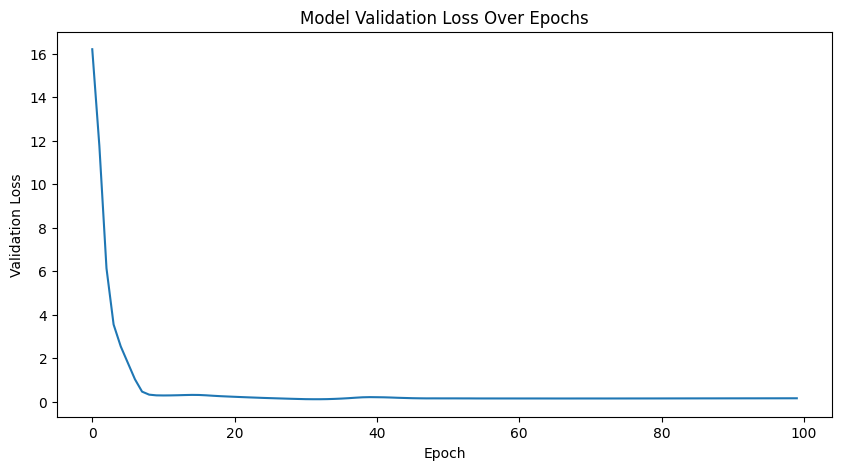

In [287]:
# plot the history
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()


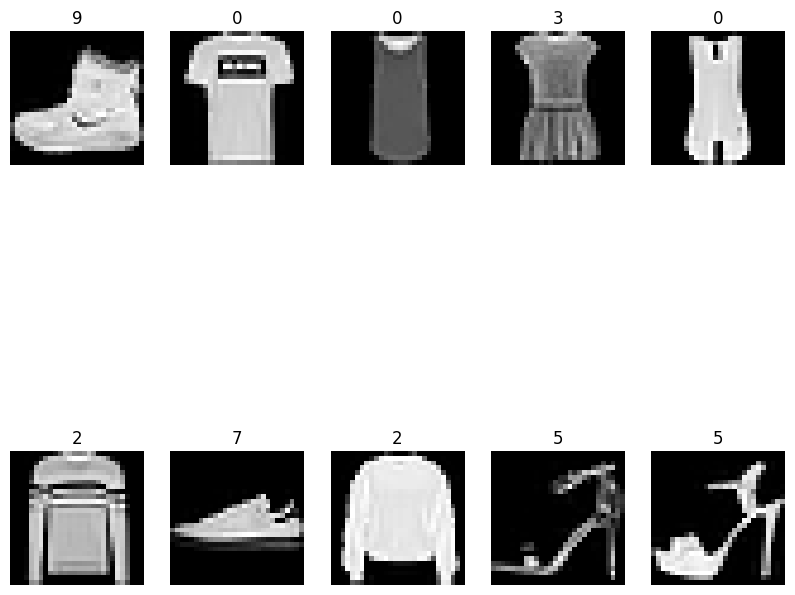

In [359]:
clear_session()
from keras.datasets import fashion_mnist

# fashionMNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# plot the first 10 images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

# plot the first 10 images


In [360]:
# inspect the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

min_val = np.min(x_train)
max_val = np.max(x_train)
print(min_val)
print(max_val)

# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# check the normalization
min_val = np.min(x_train)
max_val = np.max(x_train)
print(min_val)
print(max_val)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
0
255
0.0
1.0


In [361]:
# create a neural network
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()

adam = optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer = adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [362]:
train_history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.7504 - loss: 0.7103 - val_accuracy: 0.8372 - val_loss: 0.4491
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.8210 - loss: 0.5065 - val_accuracy: 0.8524 - val_loss: 0.4004
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8362 - loss: 0.4615 - val_accuracy: 0.8588 - val_loss: 0.3856
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.8458 - loss: 0.4346 - val_accuracy: 0.8674 - val_loss: 0.3703
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.8520 - loss: 0.4158 - val_accuracy: 0.8696 - val_loss: 0.3674
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.8565 - loss: 0.4000 - val_accuracy: 0.8723 - val_loss: 0.3555
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.8591 - loss: 0.3885 - val_accuracy: 0.8784 - val_loss: 0.3470
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.8593 -

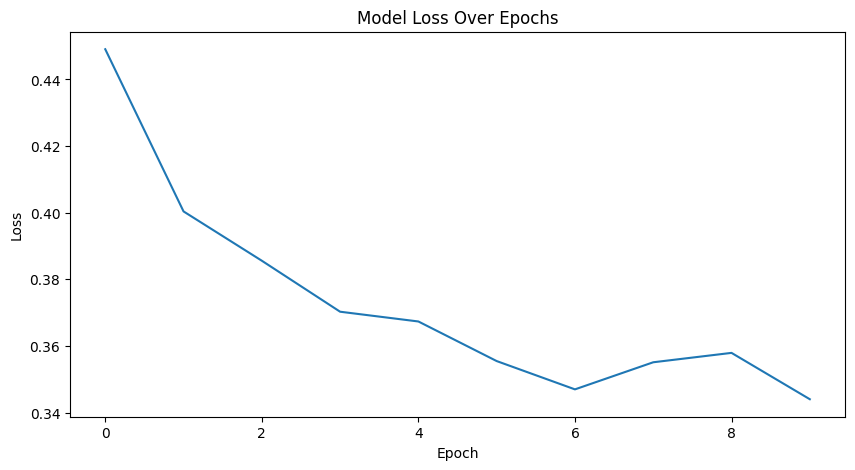

In [363]:
# plot the history
plt.figure(figsize=(10, 5))
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [364]:
# use the model to predict the test data
y_pred = model.predict(x_test)

# quantify the performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.8732 - loss: 0.3711
Test Loss: 0.37109076976776123
Test Accuracy: 0.873199999332428
